In [ ]:
# ==============================
# 🟢 Google Colab Workflow: Youth Unemployment Analysis
# ==============================

# ------------------------------
# 1️⃣ Initial Setup
# ------------------------------
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
%matplotlib inline

# Load your dataset (replace this with your actual file or variable)
# If using Colab and uploading CSV:
# from google.colab import files
# uploaded = files.upload()
# youth_unemployment = pd.read_csv("youth_unemployment_global.csv")

# If dataset is already loaded as variable:
# youth_unemployment is assumed to be available



## 2️⃣ Initial Data Assessment and Quality Checks
- Check first few rows
- Inspect column types
- Identify missing values
- Summary statistics
- Duplicates


In [ ]:
# First few rows
print(youth_unemployment.head())

# Info and data types
print(youth_unemployment.info())

# Summary statistics
print(youth_unemployment.describe())

# Check duplicates
print(f"Duplicate rows: {youth_unemployment.duplicated().sum()}")


                       Country CountryCode  Year  YouthUnemployment
0  Africa Eastern and Southern          ZH  2024          13.283002
1  Africa Eastern and Southern          ZH  2023          13.367810
2  Africa Eastern and Southern          ZH  2022          13.620217
3  Africa Eastern and Southern          ZH  2021          14.955182
4  Africa Eastern and Southern          ZH  2020          14.997030
<class 'pandas.core.frame.DataFrame'>
Index: 7981 entries, 0 to 17258
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            7981 non-null   object 
 1   CountryCode        7981 non-null   object 
 2   Year               7981 non-null   int64  
 3   YouthUnemployment  7981 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 311.8+ KB
None
              Year  YouthUnemployment
count  7981.000000        7981.000000
mean   2007.482020          16.667732
std       9.802196 

## 3️⃣ Data Cleaning and Preprocessing
- Drop duplicates
- Handle missing target values
- Handle missing features
- Ensure categorical columns are strings


In [ ]:
# Drop duplicate rows
youth_unemployment = youth_unemployment.drop_duplicates()

# Drop rows where target is missing
youth_unemployment = youth_unemployment.dropna(subset=['YouthUnemployment'])

# Fill missing Year values with median (if any)
youth_unemployment['Year'] = youth_unemployment['Year'].fillna(youth_unemployment['Year'].median())

# Ensure categorical columns are strings
youth_unemployment['Country'] = youth_unemployment['Country'].astype(str)
youth_unemployment['CountryCode'] = youth_unemployment['CountryCode'].astype(str)


## 4️⃣ Exploratory Data Analysis (EDA)
- Distribution of target
- Trends over years
- Comparison by country


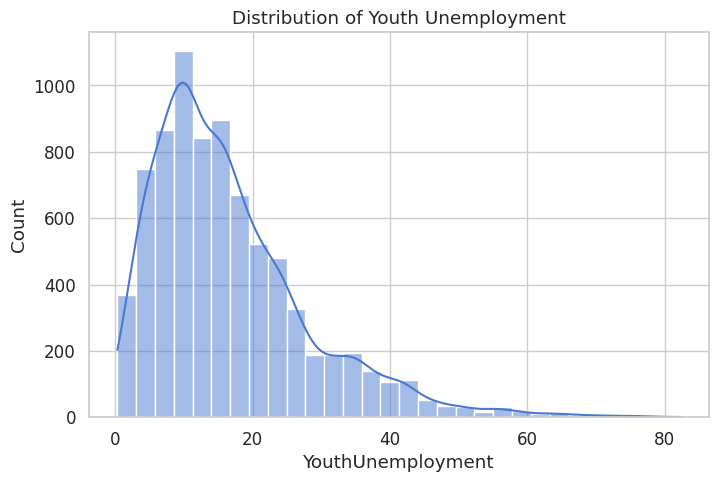

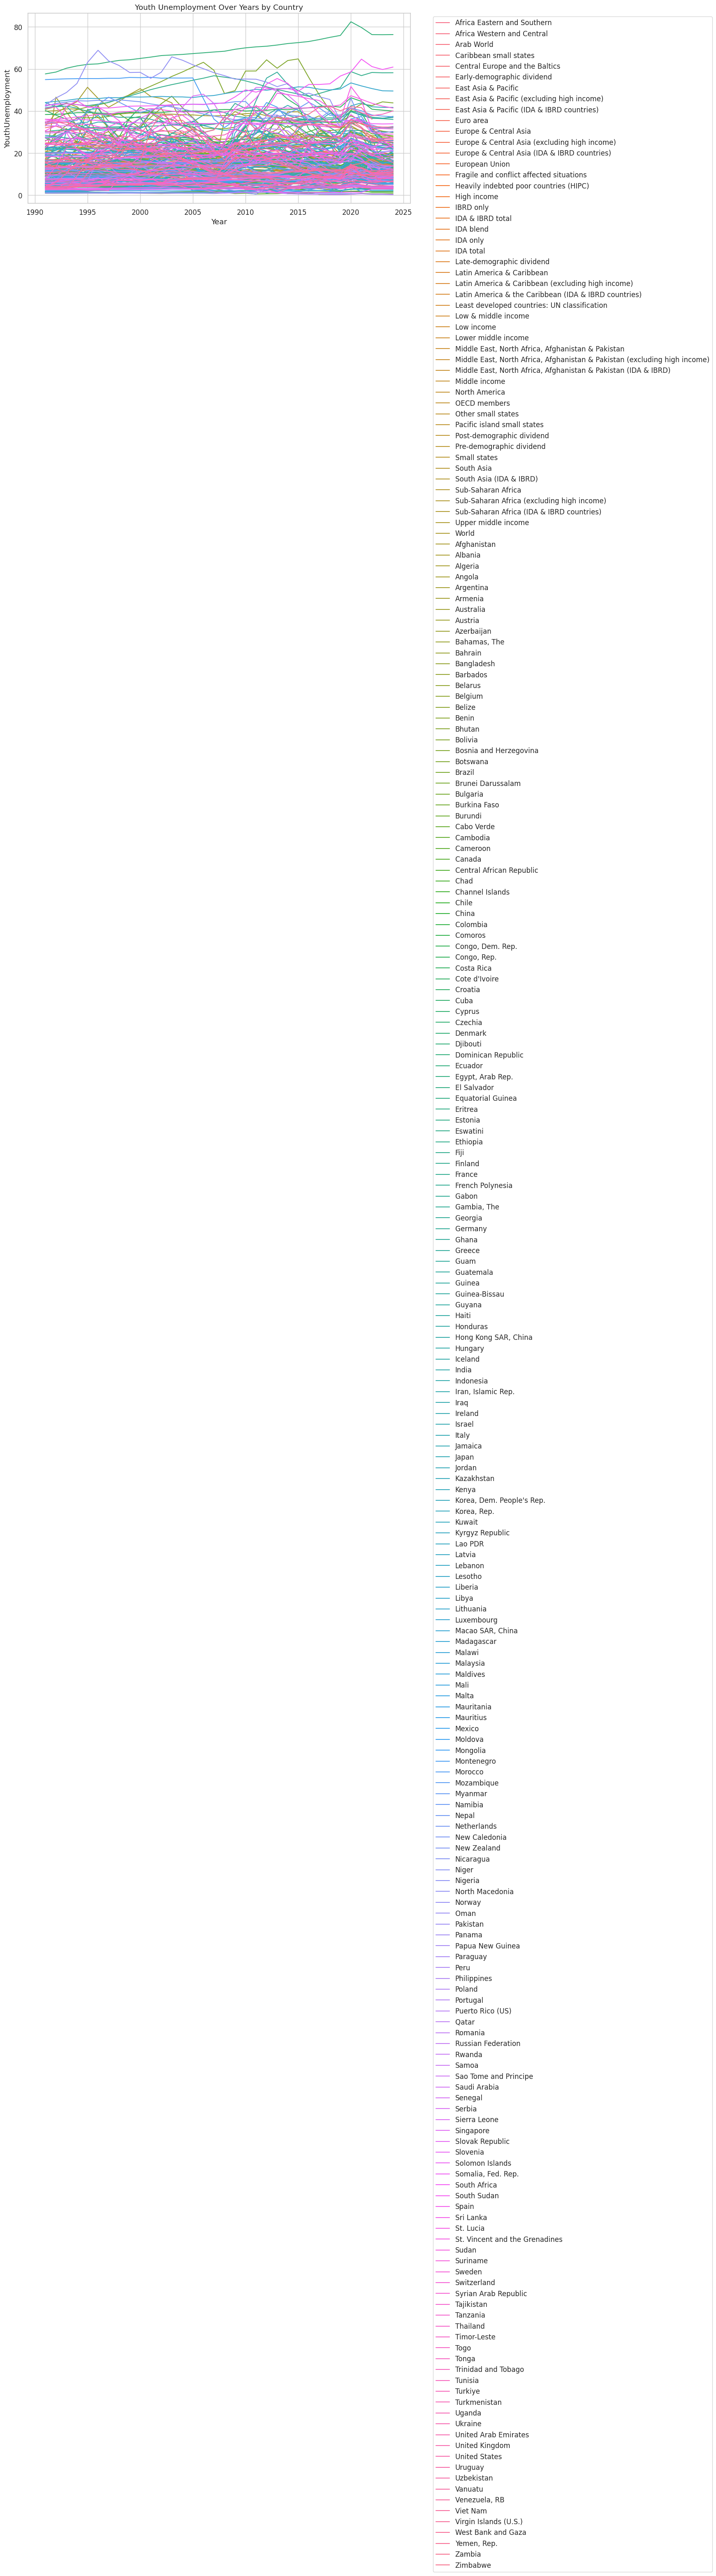

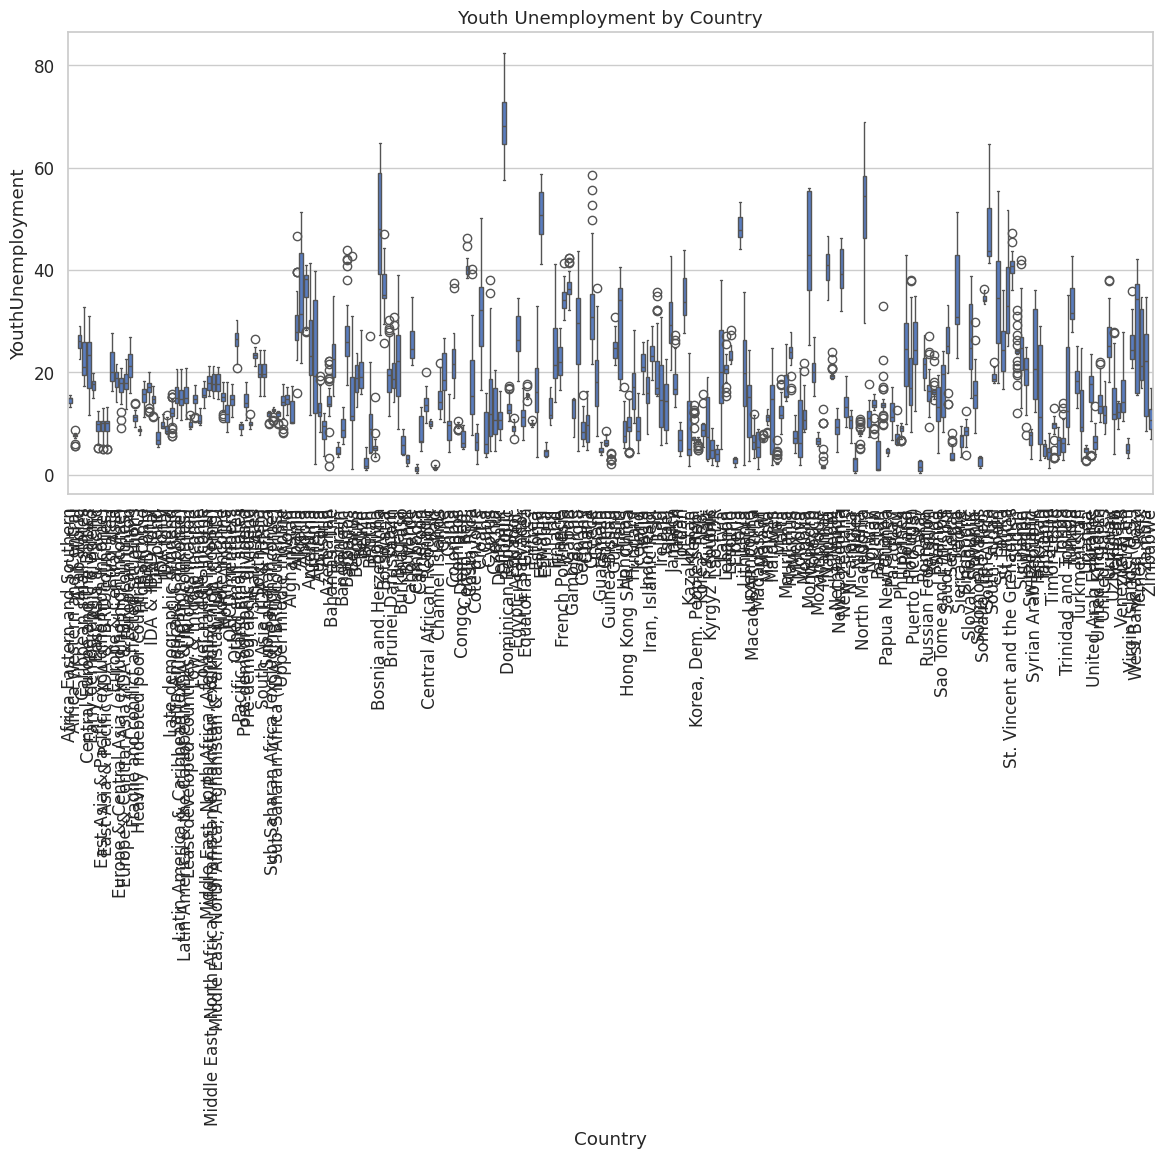

In [ ]:
# Distribution of Youth Unemployment
plt.figure(figsize=(8,5))
sns.histplot(youth_unemployment['YouthUnemployment'], kde=True, bins=30)
plt.title('Distribution of Youth Unemployment')
plt.show()

# Trend over years by country
plt.figure(figsize=(12,6))
sns.lineplot(data=youth_unemployment, x='Year', y='YouthUnemployment', hue='Country')
plt.title('Youth Unemployment Over Years by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Boxplot by country
plt.figure(figsize=(14,6))
sns.boxplot(x='Country', y='YouthUnemployment', data=youth_unemployment)
plt.xticks(rotation=90)
plt.title('Youth Unemployment by Country')
plt.show()


## 5️⃣ Missing Data Analysis
- Percent of missing values
- Visualize missingness


Country              0.0
CountryCode          0.0
Year                 0.0
YouthUnemployment    0.0
dtype: float64


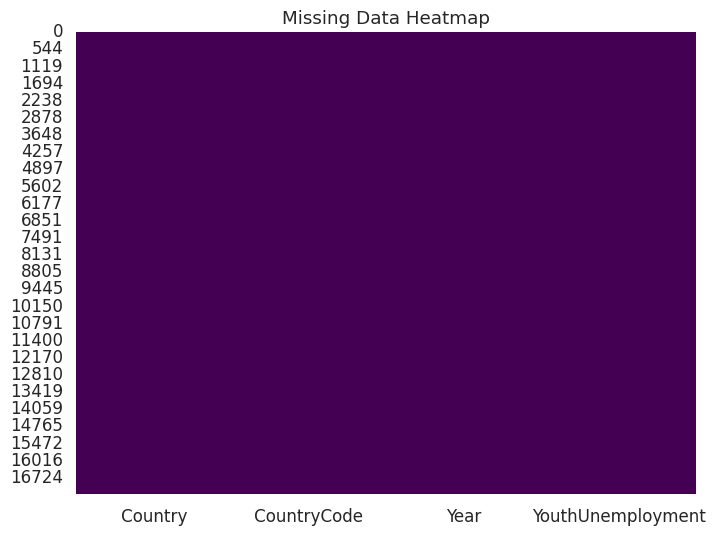

In [ ]:
# Percentage of missing values per column
missing_percent = youth_unemployment.isnull().mean() * 100
print(missing_percent)

# Heatmap of missing data
plt.figure(figsize=(8,6))
sns.heatmap(youth_unemployment.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


## ✅ Next Steps
- Handle remaining missing values if needed
- Prepare dataset for modeling (one-hot encoding, train/test split)
- Train machine learning model (e.g., Random Forest)
